<a href="https://colab.research.google.com/github/alejandr21/demo/blob/main/Job_absentisism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing DB.

The following program is to determine the probability of absentisism in a company.

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset.

Now we load the Dataset

In [2]:
# Load dataset
df_Absenteeism = pd.read_csv('Absenteeism_at_work.csv')

#df_bank = pd.read_csv('bank.csv')
print(df_Absenteeism.info())
print('Shape of dataframe:', df_Absenteeism.shape)
df_Absenteeism.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


# Analizing data

We will transform the Work load Average/day column to numeric value, for that we use the following command

In [3]:
# convert columns of DataFrame.
#df_Absenteeism = df_Absenteeism.apply(pd.to_numeric)
#Convert specific columns.
#df_Absenteeism[["Work load Average/day "]] = df_Absenteeism[["Work load Average/day "]].apply(pd.to_numeric)
#print(df_Absenteeism.info())
#print('Shape of dataframe:', df_Absenteeism.shape)
#df_Absenteeism.head()

#import locale

#locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
#'en_US.UTF-8'
#locale.atof(df_Absenteeism[["Work load Average/day "]])
#int(locale.atof(df_Absenteeism[["Work load Average/day "]]))

Dropping unnecessary columns.

In [4]:
# Drop 'Weight, Height and Body mass index' columns
df_Absenteeism = df_Absenteeism.drop(['Weight','Height','Body mass index'], axis=1)
df_Absenteeism.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,36,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,3,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,11,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2


In [5]:
# Drop 'ID' column
df_Absenteeism = df_Absenteeism.drop(['ID'], axis=1)
df_Absenteeism.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2


Now we will rename some of our features for easier handling our data.

In [6]:
# changing colums names.
df_Absenteeism.rename(columns = {'Reason for absence':'reason'}, inplace = True)
df_Absenteeism.rename(columns = {'Month of absence':'month_absece'}, inplace = True)
df_Absenteeism.rename(columns = {'Day of the week':'week_days'}, inplace = True)
df_Absenteeism.rename(columns = {'Seasons':'seasons'}, inplace = True)
df_Absenteeism.rename(columns = {'Transportation expense':'transportation'}, inplace = True)
df_Absenteeism.rename(columns = {'Distance from Residence to Work':'distance'}, inplace = True)
df_Absenteeism.rename(columns = {'Service time':'service_time'}, inplace = True)
df_Absenteeism.rename(columns = {'Age':'age'}, inplace = True)
df_Absenteeism.rename(columns = {'Work load Average/day ':'work_load'}, inplace = True)
df_Absenteeism.rename(columns = {'Hit target':'target_reached'}, inplace = True)
df_Absenteeism.rename(columns = {'Disciplinary failure':'problems'}, inplace = True)
df_Absenteeism.rename(columns = {'Education':'education'}, inplace = True)
df_Absenteeism.rename(columns = {'Son':'son'}, inplace = True)
df_Absenteeism.rename(columns = {'Social drinker':'drinker'}, inplace = True)
df_Absenteeism.rename(columns = {'Social smoker':'smoker'}, inplace = True)
df_Absenteeism.rename(columns = {'Pet':'pet'}, inplace = True)
df_Absenteeism.rename(columns = {'Absenteeism time in hours':'total_absenteeism'}, inplace = True)
print(df_Absenteeism.info())
print('Shape of dataframe:', df_Absenteeism.shape)
df_Absenteeism.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   reason             740 non-null    int64
 1   month_absece       740 non-null    int64
 2   week_days          740 non-null    int64
 3   seasons            740 non-null    int64
 4   transportation     740 non-null    int64
 5   distance           740 non-null    int64
 6   service_time       740 non-null    int64
 7   age                740 non-null    int64
 8   work_load          740 non-null    int64
 9   target_reached     740 non-null    int64
 10  problems           740 non-null    int64
 11  education          740 non-null    int64
 12  son                740 non-null    int64
 13  drinker            740 non-null    int64
 14  smoker             740 non-null    int64
 15  pet                740 non-null    int64
 16  total_absenteeism  740 non-null    int64
dtypes: int64(17)
mem

,reason,month_absece,week_days,seasons,transportation,distance,service_time,age,work_load,target_reached,problems,education,son,drinker,smoker,pet,total_absenteeism
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2


In [7]:
# changing colums names.
df_Absenteeism.rename(columns = {'Month of absence':'month_absece'}, inplace = True)
df_Absenteeism.rename(columns = {'Work load Average/day':'work_load'}, inplace = True)
print(df_Absenteeism.info())
print('Shape of dataframe:', df_Absenteeism.shape)
df_Absenteeism.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   reason             740 non-null    int64
 1   month_absece       740 non-null    int64
 2   week_days          740 non-null    int64
 3   seasons            740 non-null    int64
 4   transportation     740 non-null    int64
 5   distance           740 non-null    int64
 6   service_time       740 non-null    int64
 7   age                740 non-null    int64
 8   work_load          740 non-null    int64
 9   target_reached     740 non-null    int64
 10  problems           740 non-null    int64
 11  education          740 non-null    int64
 12  son                740 non-null    int64
 13  drinker            740 non-null    int64
 14  smoker             740 non-null    int64
 15  pet                740 non-null    int64
 16  total_absenteeism  740 non-null    int64
dtypes: int64(17)
mem

,reason,month_absece,week_days,seasons,transportation,distance,service_time,age,work_load,target_reached,problems,education,son,drinker,smoker,pet,total_absenteeism
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,2


In [8]:
df_Absenteeism.rename(columns = {'Work load Average/day ':'work_load'}, inplace = True)

# Distribution of the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


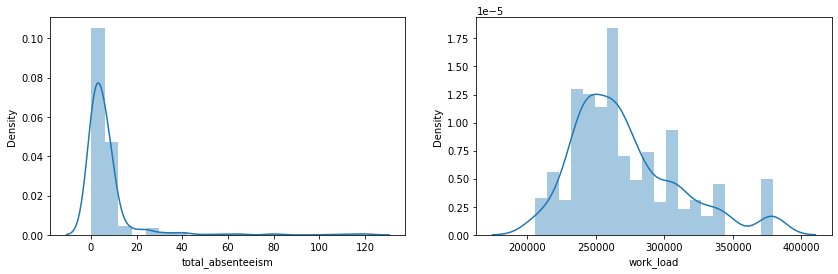

In [9]:
#Distribution of Data.
plt.figure(figsize=(14,4))
plt.subplot(1,2,1) 
A1 = sns.distplot(df_Absenteeism.total_absenteeism, bins=20)
plt.subplot(1,2,2) 
B1 = sns.distplot(df_Absenteeism.work_load, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


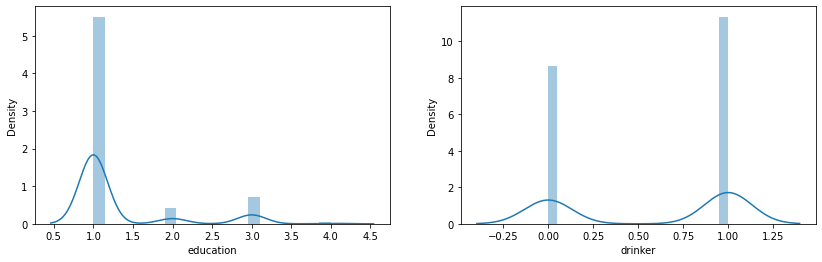

In [10]:
#Distribution of Data.
plt.figure(figsize=(14,4))
plt.subplot(1,2,1) 
A1 = sns.distplot(df_Absenteeism.education, bins=20)
plt.subplot(1,2,2) 
B1 = sns.distplot(df_Absenteeism.drinker, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


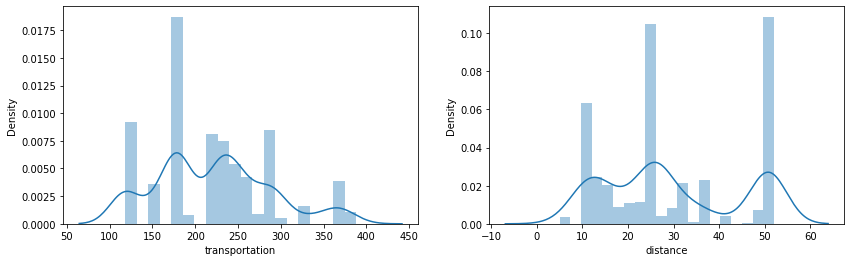

In [11]:
#Distribution of Data.
plt.figure(figsize=(14,4))
plt.subplot(1,2,1) 
A1 = sns.distplot(df_Absenteeism.transportation, bins=20)
plt.subplot(1,2,2) 
B1 = sns.distplot(df_Absenteeism.distance, bins=20)

# Box plots

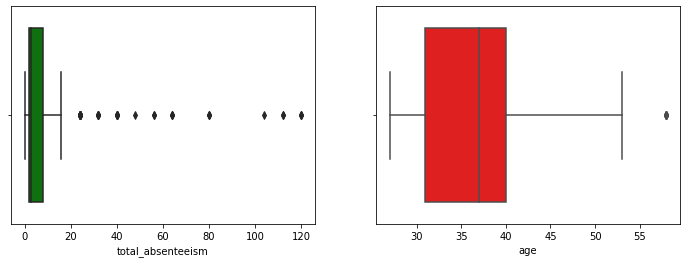

In [12]:
#We proceed to perform some box plot for some features.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
g1 = sns.boxplot(x=df_Absenteeism["total_absenteeism"], color= "green")
plt.subplot(1,2,2)
g2 = sns.boxplot(x=df_Absenteeism["age"], color= "red")

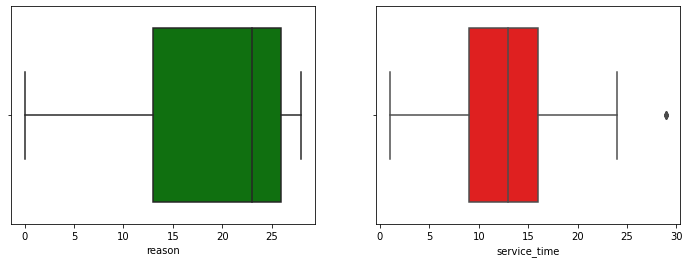

In [13]:
#We proceed to perform some box plot for some features.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
g3 = sns.boxplot(x=df_Absenteeism["reason"], color= "green")
plt.subplot(1,2,2)
g4 = sns.boxplot(x=df_Absenteeism["service_time"], color= "red")

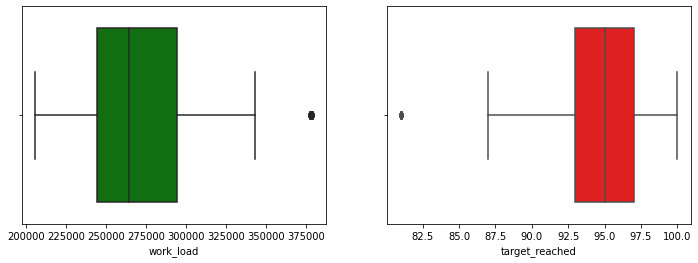

In [14]:
#We proceed to perform some box plot for some features.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
g5 = sns.boxplot(x=df_Absenteeism["work_load"], color= "green")
plt.subplot(1,2,2)
g6 = sns.boxplot(x=df_Absenteeism["target_reached"], color= "red")

# Class distribution.

In [15]:
df_Absenteeism['total_absenteeism'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: total_absenteeism, dtype: int64

The next thing we want to do is make sure there are no missing values.

In [16]:
df_Absenteeism.isnull().sum()

reason               0
month_absece         0
week_days            0
seasons              0
transportation       0
distance             0
service_time         0
age                  0
work_load            0
target_reached       0
problems             0
education            0
son                  0
drinker              0
smoker               0
pet                  0
total_absenteeism    0
dtype: int64

# Bar plots

In [17]:
print("The Smallest Element in this List is : ", min(df_Absenteeism.age.values))
print("The Largest Element in this List is : ", max(df_Absenteeism.age.values))

The Smallest Element in this List is :  27
The Largest Element in this List is :  58


Now we proceeed to plot the absenteeism by age.

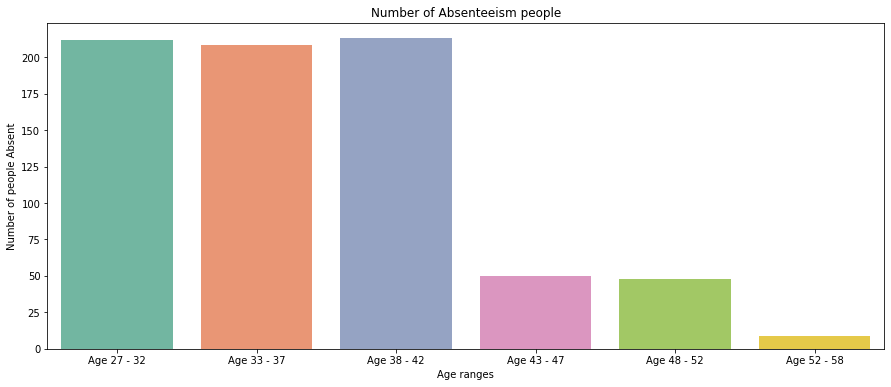

In [18]:
age27_32 = df_Absenteeism.age[(df_Absenteeism.age >= 27) & (df_Absenteeism.age <= 32)]
age33_37 = df_Absenteeism.age[(df_Absenteeism.age >= 33) & (df_Absenteeism.age <= 37)]
age38_42 = df_Absenteeism.age[(df_Absenteeism.age >= 38) & (df_Absenteeism.age <= 42)]
age43_47 = df_Absenteeism.age[(df_Absenteeism.age >= 43) & (df_Absenteeism.age <= 47)]
age48_52 = df_Absenteeism.age[(df_Absenteeism.age >= 48) & (df_Absenteeism.age <= 52)]
age53_58 = df_Absenteeism.age[(df_Absenteeism.age >= 53) & (df_Absenteeism.age <= 58)]

agex = ["Age 27 - 32", "Age 33 - 37", "Age 38 - 42", "Age 43 - 47", "Age 48 - 52", "Age 52 - 58"]
agey = [len(age27_32.values), len(age33_37.values), len(age38_42.values), len(age43_47.values), len(age48_52.values), len(age53_58.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="Set2")
plt.title("Number of Absenteeism people")
plt.xlabel("Age ranges")
plt.ylabel("Number of people Absent")
plt.show()

Now we will determine the people with sons and presented absenteeism.

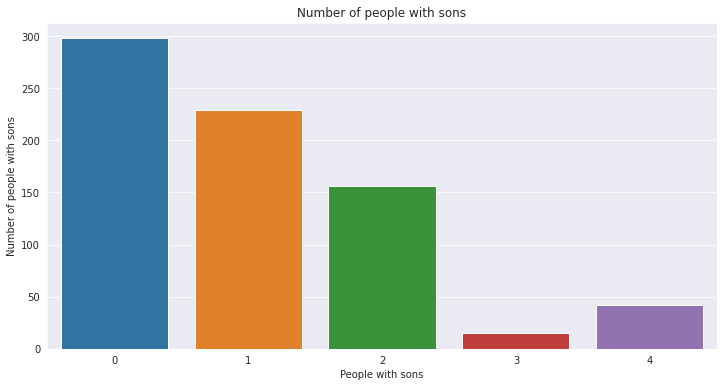

In [19]:
Sons = df_Absenteeism.son.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x= Sons.index, y= Sons.values)
plt.title("Number of people with sons")
plt.xlabel("People with sons")
plt.ylabel("Number of people with sons")
plt.show()

# Data Normalization.

In [20]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_Absenteeism_ready = df_Absenteeism.copy()

scaler = StandardScaler()
num_cols = ['reason', 'transportation', 'distance', 'work_load', 'target_reached']
df_Absenteeism_ready[num_cols] = scaler.fit_transform(df_Absenteeism_ready[num_cols])

df_Absenteeism_ready.head()

,reason,month_absece,week_days,seasons,transportation,distance,service_time,age,work_load,target_reached,problems,education,son,drinker,smoker,pet,total_absenteeism
0,0.804938,7,3,1,1.011408,0.429556,13,33,-0.818212,0.638686,0,1,2,1,0,1,4
1,-2.280124,7,3,1,-1.544379,-1.121694,18,50,-0.818212,0.638686,1,1,1,1,0,0,0
2,0.448970,7,4,1,-0.632665,1.441240,18,38,-0.818212,0.638686,0,1,0,1,0,0,2
3,-1.449530,7,5,1,0.861947,-1.661258,14,39,-0.818212,0.638686,0,1,2,1,1,0,4
4,0.448970,7,5,1,1.011408,0.429556,13,33,-0.818212,0.638686,0,1,2,1,0,1,2


Now we will proceed to transform the last column into Binary.

In [21]:
# Transform target variable into Binary.
df_Absenteeism_ready['total_absenteeism'] = df_Absenteeism_ready['total_absenteeism'].apply(lambda x: 1 if x > 3 else 0)
df_Absenteeism_ready.head()

,reason,month_absece,week_days,seasons,transportation,distance,service_time,age,work_load,target_reached,problems,education,son,drinker,smoker,pet,total_absenteeism
0,0.804938,7,3,1,1.011408,0.429556,13,33,-0.818212,0.638686,0,1,2,1,0,1,1
1,-2.280124,7,3,1,-1.544379,-1.121694,18,50,-0.818212,0.638686,1,1,1,1,0,0,0
2,0.448970,7,4,1,-0.632665,1.441240,18,38,-0.818212,0.638686,0,1,0,1,0,0,0
3,-1.449530,7,5,1,0.861947,-1.661258,14,39,-0.818212,0.638686,0,1,2,1,1,0,1
4,0.448970,7,5,1,1.011408,0.429556,13,33,-0.818212,0.638686,0,1,2,1,0,1,0


# Heat Map

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

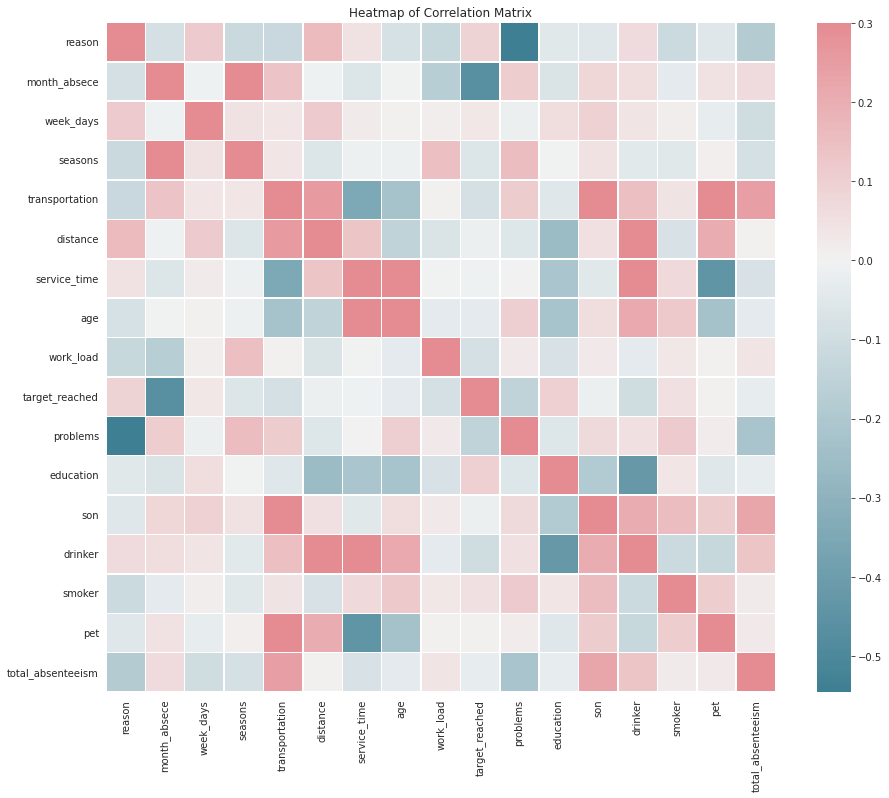

In [22]:
corr = df_Absenteeism_ready.corr()
# Heatmap
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

# Extracting the dependent Variable.

In [23]:
# Extract the deposte_cat column (the dependent variable)
corr_Absenteeism_ready = pd.DataFrame(corr['total_absenteeism'].drop('total_absenteeism'))
corr_Absenteeism_ready.sort_values(by = 'total_absenteeism', ascending = False)

,total_absenteeism
transportation,0.246761
son,0.223815
drinker,0.134648
month_absece,0.066388
work_load,0.041579
pet,0.029080
smoker,0.023590
distance,0.009341
target_reached,-0.027488
education,-0.028023


# Splitting the data for testing and training.

In [24]:
# Select Features
feature = df_Absenteeism_ready.drop('total_absenteeism', axis=1)

# Select Target
target = df_Absenteeism_ready['total_absenteeism']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (592, 16)
Shape of testing feature: (148, 16)
Shape of training label: (592,)
Shape of training label: (148,)


# Modeling Section

In [25]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    disp = metrics.ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Now we build the model, starting with a decision tree.

In [29]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=4)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

Now we evaluate the model

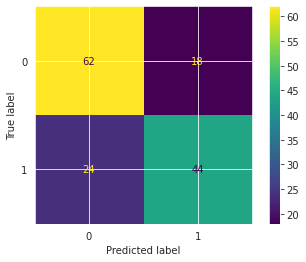

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        80
           1       0.71      0.65      0.68        68

    accuracy                           0.72       148
   macro avg       0.72      0.71      0.71       148
weighted avg       0.72      0.72      0.71       148

Accuracy: 0.7162162162162162
Precision: 0.7096774193548387
Recall: 0.6470588235294118
F1 Score: 0.6769230769230768
Cohens Kappa Score: 0.4248704663212436
Area Under Curve: 0.8066176470588236


In [30]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])

Now we proceed to create a graphic of our model.

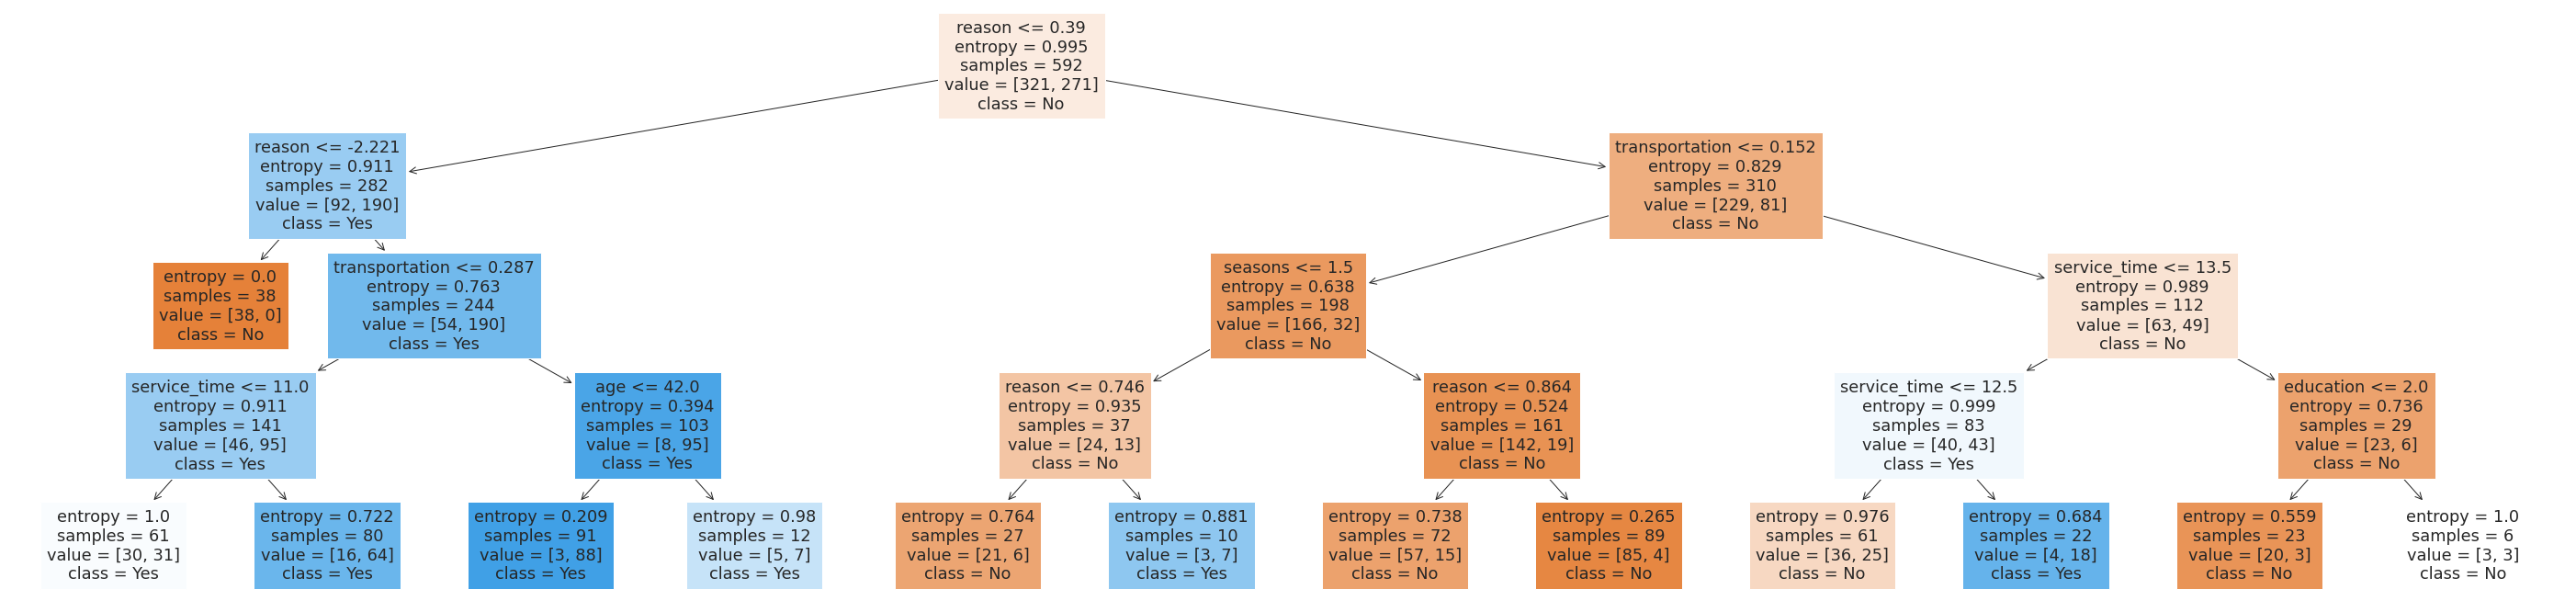

In [31]:
text_representation = tree.export_text(dtc)
fig = plt.figure(figsize=(50,12))
tree.plot_tree(dtc, 
                   feature_names=X_train.columns,  
                   class_names=["No","Yes"],
                   filled=True)
fig.savefig("decistion_tree.png",bbox_inches = 'tight')


with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

Now we proceed with a random forest.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(n_estimators = 20, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

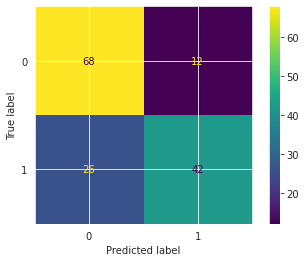

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        80
           1       0.78      0.62      0.69        68

    accuracy                           0.74       148
   macro avg       0.75      0.73      0.74       148
weighted avg       0.75      0.74      0.74       148

Accuracy: 0.7432432432432432
Precision: 0.7777777777777778
Recall: 0.6176470588235294
F1 Score: 0.6885245901639345
Cohens Kappa Score: 0.4749813293502614
Area Under Curve: 0.8508272058823529
Confusion Matrix:
 [[68 12]
 [26 42]]


In [33]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Now we plot a KNN.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

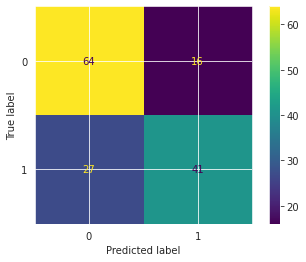

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        80
           1       0.72      0.60      0.66        68

    accuracy                           0.71       148
   macro avg       0.71      0.70      0.70       148
weighted avg       0.71      0.71      0.71       148

Accuracy: 0.7094594594594594
Precision: 0.7192982456140351
Recall: 0.6029411764705882
F1 Score: 0.6559999999999999
Cohens Kappa Score: 0.4078898399702271
Area Under Curve: 0.7704963235294118
Confusion Matrix:
 [[64 16]
 [27 41]]


In [35]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

# Now we perform a model comparisson.

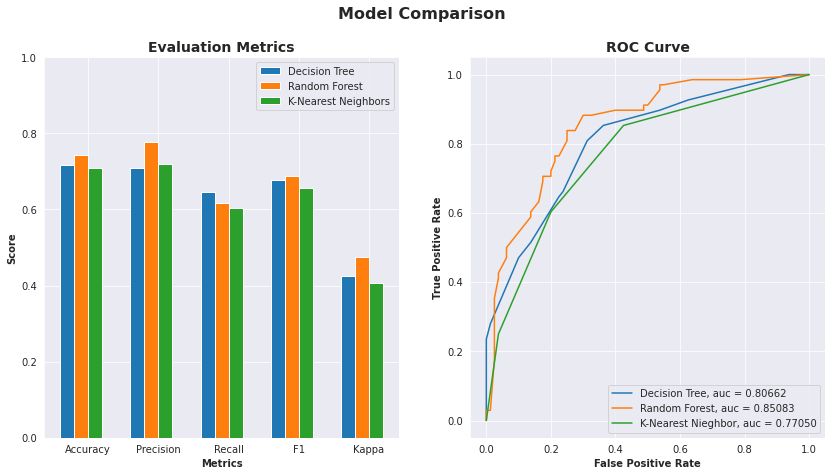

In [37]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r4 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Model Optimization.

In [38]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

# 1. n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
# 2. max_depth: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
# 3. min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
# 4. min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

param_grid = {
    'max_depth': [4, 6, 8],
    #'criterion': ["gini", "entropy"],
    'n_estimators': [50, 150, 200],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 4]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

Optimized model evaluation.

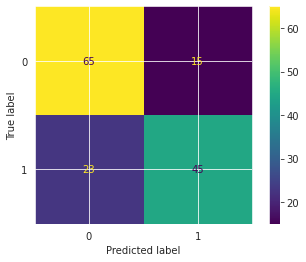

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        80
           1       0.75      0.66      0.70        68

    accuracy                           0.74       148
   macro avg       0.74      0.74      0.74       148
weighted avg       0.74      0.74      0.74       148

Accuracy: 0.7432432432432432
Precision: 0.75
Recall: 0.6617647058823529
F1 Score: 0.7031250000000001
Cohens Kappa Score: 0.478486646884273
Area Under Curve: 0.8486213235294117
Confusion Matrix:
 [[65 15]
 [23 45]]


In [39]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

We compare the models one more time.

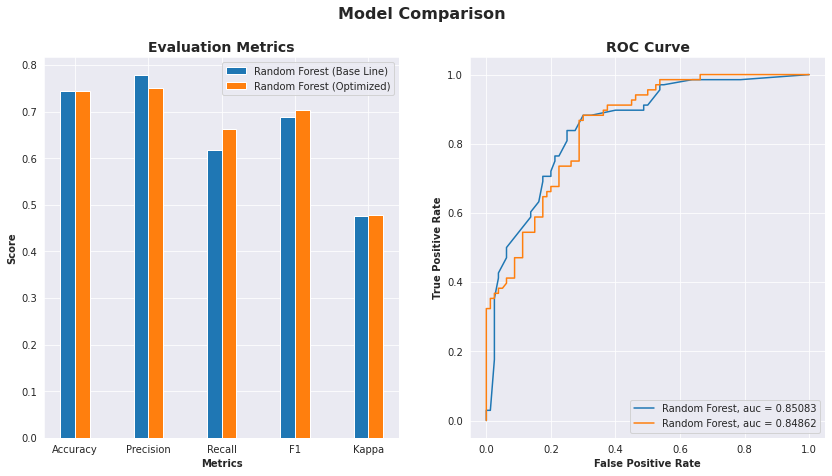

Change of 0.00% on accuracy.
Change of -3.57% on precision.
Change of 7.14% on recall.
Change of 2.12% on F1 score.
Change of 0.74% on Kappa score.
Change of -0.26% on AUC.


In [40]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

# Deployment.

In [42]:
df_Absenteeism_ready['Absenteeism_prediction'] = rf.predict(feature)
df_Absenteeism_ready['Absenteeism_prediction'] = df_Absenteeism_ready['Absenteeism_prediction'].apply(lambda x: 'yes' if x==1 else 'no')

# Save new dataframe into csv file
df_Absenteeism_ready.to_csv('Absenteeism_ready.csv', index=False)

df_Absenteeism_ready.head(10)

,reason,month_absece,week_days,seasons,transportation,distance,service_time,age,work_load,target_reached,problems,education,son,drinker,smoker,pet,total_absenteeism,Absenteeism_prediction
0,0.804938,7,3,1,1.011408,0.429556,13,33,-0.818212,0.638686,0,1,2,1,0,1,1,yes
1,-2.280124,7,3,1,-1.544379,-1.121694,18,50,-0.818212,0.638686,1,1,1,1,0,0,0,no
2,0.448970,7,4,1,-0.632665,1.441240,18,38,-0.818212,0.638686,0,1,0,1,0,0,0,yes
3,-1.449530,7,5,1,0.861947,-1.661258,14,39,-0.818212,0.638686,0,1,2,1,1,0,1,yes
4,0.448970,7,5,1,1.011408,0.429556,13,33,-0.818212,0.638686,0,1,2,1,0,1,0,no
5,0.448970,7,6,1,-0.632665,1.441240,18,38,-0.818212,0.638686,0,1,0,1,0,0,0,no
6,0.330313,7,6,1,2.087529,1.508686,3,28,-0.818212,0.638686,0,1,1,1,0,4,1,yes
7,0.448970,7,6,1,0.577971,1.373794,11,36,-0.818212,0.638686,0,1,4,1,0,0,1,yes
8,-0.025655,7,2,1,-0.991372,-1.189139,14,34,-0.818212,0.638686,0,1,2,1,0,0,1,yes
9,0.330313,7,2,1,0.204318,-1.256585,14,37,-0.818212,0.638686,0,3,1,0,0,1,1,yes


Whit this we finished the Absentesism project. Thank you! 😬